# Imports

In [1]:
from CITS_Class import CITS_Analysis
import  numpy as np
import matplotlib.pyplot as plt


# Implementation

## Define object

Here is the meta data

In [ ]:
filepath = 'cits_data.3ds'

data = CITS_Analysis(filepath)

#Meta data 
data.header


File import successful.


{'Grid dim': '"250 x 80"',
 'Grid settings': '-8.998863E-7;-2.859467E-8;2.500000E-7;2.500000E-7;-6.000000E+1',
 'Filetype': 'Linear',
 'Sweep Signal': '"Bias (V)"',
 'Fixed parameters': '"Sweep Start;Sweep End"',
 'Experiment parameters': '"X (m);Y (m);Z (m);Z offset (m);Settling time (s);Integration time (s);Z-Ctrl hold;Final Z (m)"',
 '# Parameters (4 byte)': '10',
 'Experiment size (bytes)': '1452',
 'Points': '121',
 'Channels': '"Current (A);LIX 1 omega (A);LIY 1 omega (A)"',
 'Delay before measuring (s)': '10.000000E-3',
 'Experiment': '"Grid Spectroscopy"',
 'Start time': '"03.11.2023 17:47:12"',
 'End time': '"04.11.2023 08:23:48"',
 'User': '',
 'Comment': '',
 'Bias>Bias (V)': '-1.5E+0',
 'Bias>Calibration (V/V)': '1E+0',
 'Bias>Offset (V)': '0E+0',
 'Bias Spectroscopy>Sweep Start (V)': '-1.5E+0',
 'Bias Spectroscopy>Sweep End (V)': '1.5E+0',
 'Bias Spectroscopy>Num Pixel': '121',
 'Bias Spectroscopy>Z Avg time (s)': '50E-3',
 'Bias Spectroscopy>Z offset (m)': '0E+0',
 'Bias 

## CITS attributes:

In [3]:

# Frame size
frame_size = data.get_frame_size()
print('frame_size = ', frame_size)

#Grid size of CITS:
grid_size =  data.data_size
print('\ngrid_size = ',grid_size)

frame_size =  (2.5e-07, 2.5e-07)

grid_size =  "250 x 80"


## Spectral Analysis

(80, 250, 121)


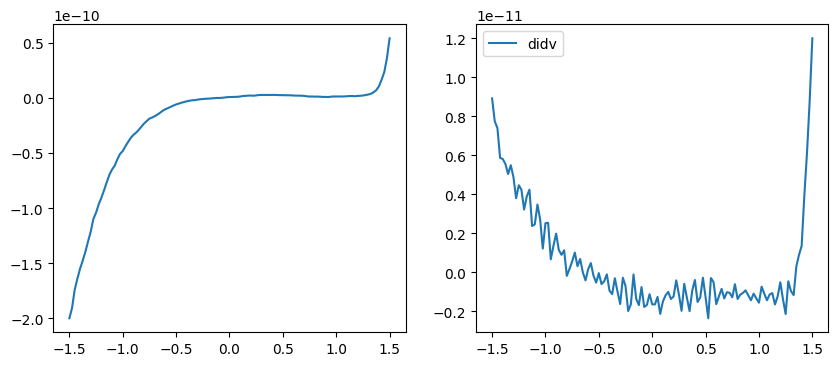

In [4]:
#Bias sweep range

V_range =  data.V_range



# Current Hyper-Spectral data
i = data.current
didv = data.didv_x
print(i.shape)



#Use position index on the hyperspectral data
i = i[0, 0]
didv = didv[0,0]
v = V_range

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ax[0].plot(v, i, label = "current")
ax[0].legend
ax[1].plot(v, didv, label = "didv")
ax[1].legend()


Use position (in nm) to get the closest data

[np.float64(1.9936708860759493e-07), np.float64(1.9979919678714856e-07)] [63, 199]


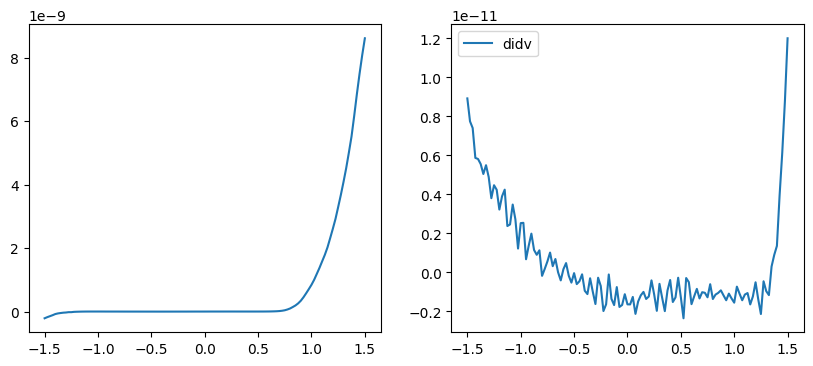

In [5]:

probe_point = [2E-7, 2E-7]

point, point_index = data.nearest_point(probe_point)

print(point, point_index)

#Current 
 
i =  data.current[point_index[0], point_index[1]]
didv_x = data.didv_x[point_index[0], point_index[1]]
v = data.V_range

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ax[0].plot(v, i, label = "current")
ax[0].legend
ax[1].plot(v, didv, label = "didv")
ax[1].legend()


## Get CITS maps

### Current maps

Nearest Probed bias =  1.2000000000000002


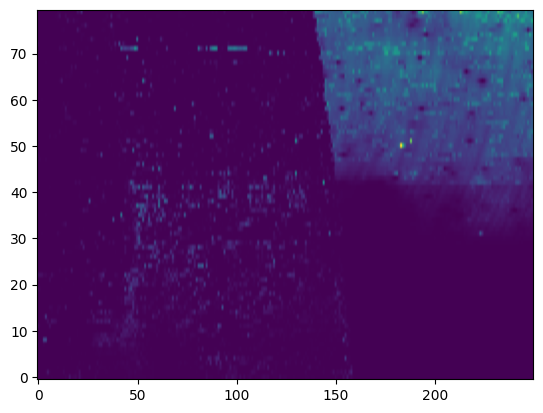

In [9]:

fig = plt.plot(figsize=(7, 10))

probe_bias = 1.2
i_2D, V_actual = data.current_map(probe_bias)
print('Nearest Probed bias = ',V_actual)




plt.imshow(i_2D, aspect='auto', origin = 'lower')

plt.show()


### conductivity maps (didv) maps 

Nearest Probed bias =  1.2000000000000002


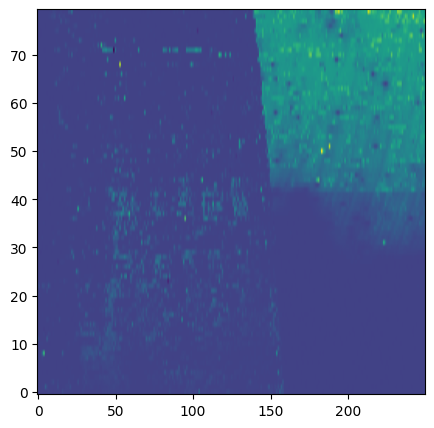

In [12]:


fig = plt.figure(figsize=(5, 5))

probe_bias = 1.2
i_2D, V_actual = data.didv_x_map(probe_bias)
print('Nearest Probed bias = ',V_actual)

plt.imshow(i_2D, aspect = 'auto', origin = 'lower')
plt.show()